<a href="https://colab.research.google.com/github/vineetisb/ml/blob/main/ML1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn import tree  
from sklearn import metrics  #initialize decision tree
import io
from google.colab import files

#uploaded = files.upload()

redwinedf = pd.read_csv("/content/winequality-red.csv")

redwinedf.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


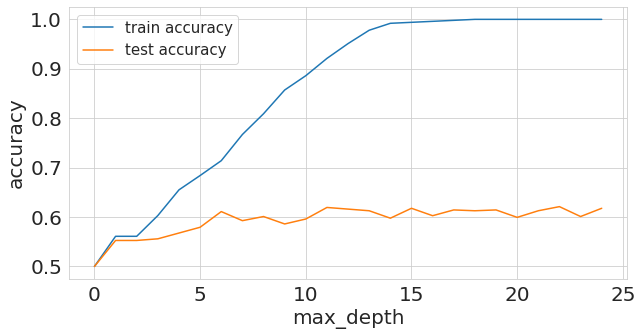

In [2]:
matplotlib.rc('xtick', labelsize = 20)
matplotlib.rc('ytick', labelsize = 20)

train_accuracies = [0.5]
test_accuracies = [0.5]

quality_mapping = {  3: 0,  4: 1,  5: 2,  6: 3,  7: 4,  8: 5  }  
#you can use the map function of pandas with  #any dictionary to convert the 
#values in a given  #column to values in the dictionary  
redwinedf.loc[:, "quality"] = redwinedf.quality.map(quality_mapping)  


# shuffling data with reset index

redwinedf = redwinedf.sample(frac=1).reset_index(drop = True)
df_train = redwinedf.head(1000)
df_test = redwinedf.tail(599)
cols = ['fixed acidity',  'volatile acidity',  'citric acid', 'residual sugar',  
        'chlorides',  'free sulfur dioxide',  'total sulfur dioxide',  
        'density',  'pH',  'sulphates',  'alcohol'] 

for depth in range(1,25):
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf.fit(df_train[cols],df_train.quality)
    #generate predictions on the training set  
    train_predictions = clf.predict(df_train[cols])
    #generate predictions on the test set  
    test_predictions = clf.predict(df_test[cols])  
    #calculate the accuracy of predictions on  #training data set  
    train_accuracy = metrics.accuracy_score(  df_train.quality, train_predictions  ) 
    #calculate the accuracy of predictions on  #test data set  
    test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions  ) 
    # append in arrays
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    

#create two plots using matplotlib  #and seaborn  
plt.figure(figsize=(10, 5))  
sns.set_style("whitegrid")  
plt.plot(train_accuracies, label="train accuracy")  
plt.plot(test_accuracies, label="test accuracy")  
plt.legend(loc="upper left", prop={'size': 15})  
plt.xticks(range(0, 26, 5))  
plt.xlabel("max_depth", size=20)  
plt.ylabel("accuracy", size=20)  
plt.show() 